### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from utilities import *

plt.rcParams['figure.figsize'] = (12, 7)

<img src="sub-b-credit-card.png" align="center"/>

### Highlights of the Project
* Using resampling techniques in improving recall score of the machine learning models.
* Using SHAP, PDP, and ICE for model interpretability.
* Using 7 ML models, including AdaBoost, in predicting credit card clients that will churn.
* Gradient Boosting Method yielded the highest test accuracy, recall and precision scores
* Total Transaction Count is the most important features in minimizing churn customers

### What is churn?

The churn that this project refers to is the customers that cancelled their membership of their credit card or did not renew their membership upon expiry.

### Why is it important to predict customer churn?

* This offers huge savings for the company because it is more cheaper to retain customers than invest in new ones.
* Management can gain a better understanding in future expected revenue which can be used in proper planning and budget allocation for future marketing and retention programs.
* The company can identify and improve areas where customer service is lacking based on the different reasons of customer for churning.

### Loading the Dataset

In [2]:
df = pd.read_csv('BankChurners.csv.zip')
df = df.iloc[:, 1:21]

### Data Summary

<table style="width:100%">
  <tr>
    <th>Features</th>
    <th>Description</th>
    <th>Data Type</th>
  </tr>
  <tr>
    <td>Attrition_Flag</td>
    <td>Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"</td>
    <td>string (Nominal)</td>
  </tr>
   <tr>
    <td>Customer_Age</td>
    <td>Age in Years</td>
    <td>int</td>
  </tr> 
  <tr>
    <td>Gender</td>
    <td>Gender of the account holder</td>
    <td>string (Nominal)</td>
  </tr>
  <tr>
    <td>Dependent_count</td>
    <td>Number of dependents</td>
    <td>int</td>
  </tr>
  <tr>
    <td>Education_Level</td>
    <td>Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.</td>
    <td>string (Ordinal)</td>
  </tr>  
  <tr>
    <td>Marital_Status</td>
    <td>Marital status of the account holder</td>
    <td>string (Nominal)</td>
  </tr>
  <tr>
    <td>Income_Category</td>
    <td>Annual Income Category of the account holder</td>
    <td>string (Nominal)</td>
  </tr>
  <tr>
    <td>Card_Category</td>
    <td>Type of Card</td>
    <td>string (Ordinal)</td>
  </tr>  
  <tr>
    <td>Months_on_book</td>
    <td>Period of relationship with the bank</td>
    <td>int</td>
  </tr>
  <tr>
    <td>Total_Relationship_Count</td>
    <td>Total no. of products held by the customer</td>
    <td>int</td>
  </tr>   
   <tr>
    <td>Months_Inactive_12_mon</td>
    <td>No. of months inactive in the last 12 months</td>
    <td>int</td>
  </tr>   
   <tr>
    <td>Contacts_Count_12_mon</td>
    <td>No. of Contacts between the customer and bank in the last 12 months</td>
    <td>int</td>
  </tr>   
    <tr>
    <td>Credit_Limit</td>
    <td>Credit Limit on the Credit Card</td>
    <td>float</td>
  </tr>
   <tr>
    <td>Total_Revolving_Bal</td>
    <td>The balance that carries over from one month to the next is the revolving balance</td>
    <td>int</td>
  </tr>  
   <tr>
    <td>Avg_Open_To_Buy</td>
    <td>Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)</td>
    <td>float</td>
  </tr>  
    <tr>
    <td>Total_Trans_Amt</td>
    <td>Total Transaction Amount (Last 12 months)</td>
    <td>int</td>
  </tr> 
    <tr>
    <td>Total_Trans_Ct</td>
    <td>Total Transaction Count (Last 12 months)</td>
    <td>int</td>
  </tr> 
    <tr>
    <td>Total_Ct_Chng_Q4_Q1</td>
    <td>Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter</td>
    <td>float</td>
  </tr> 
    <tr>
    <td>Total_Amt_Chng_Q4_Q1</td>
    <td>Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter</td>
    <td>float</td>
  </tr> 
    <tr>
    <td>Avg_Utilization_Ration</td>
    <td>Represents how much of the available credit the customer spent</td>
    <td>float</td>
  </tr>
</table> 

### Exploratory Data Analysis

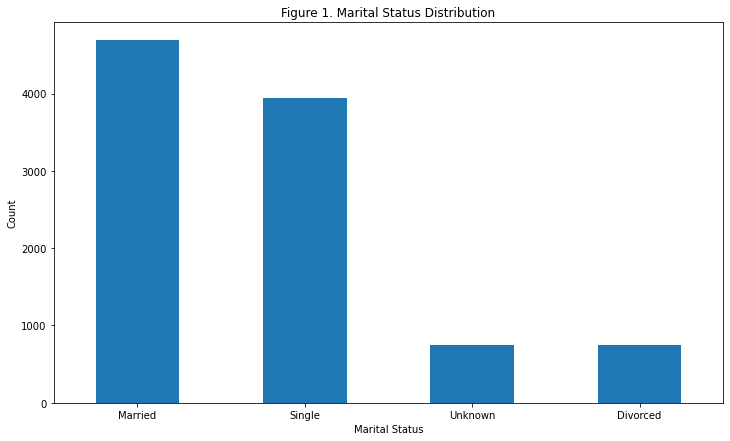

In [3]:
plot_features(df, 'Marital_Status', 1)

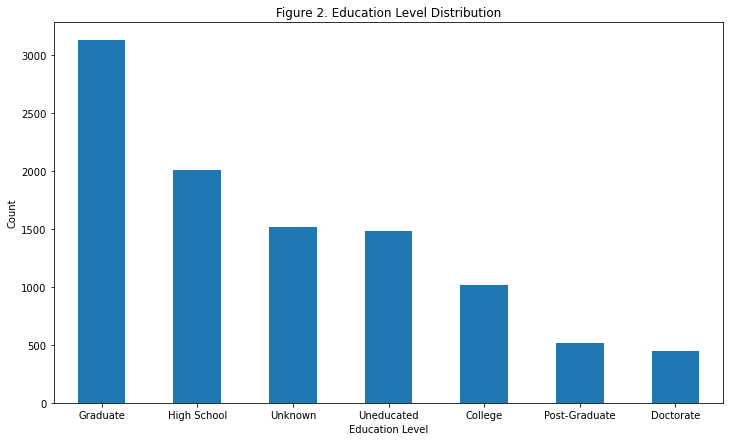

In [4]:
plot_features(df, 'Education_Level', 2)

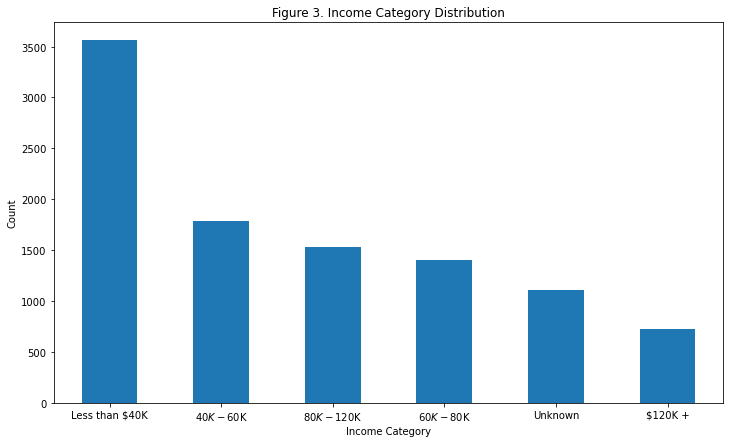

In [5]:
plot_features(df, 'Income_Category', 3)

Figure 1, 2, and 3 shows the distribution of the features that has 'Unknown' data points. <br><br>
Total # of Unknowns: <br>
`Marital_Status` = 749 datapoints which is 7.4% <br>
`Education_Level` = 1,519 datapoints which is 15.0% <br>
`Income_Category` = 1,112 datapoints which is 11.0% <br>

Total Unknown value = 3380

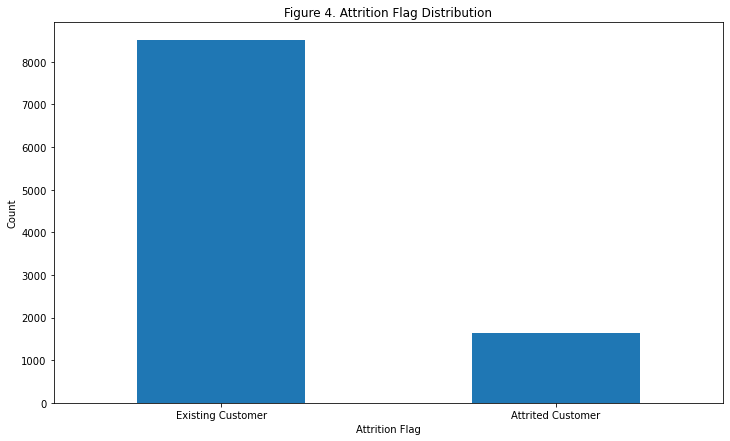

In [6]:
plot_features(df, 'Attrition_Flag', 4)

The Attrited Customer data is at 16.07% which indicates that our dataset is imbalanced since we will be using the `Attrition_Flag` as target variable when feeding it to the Machine Learning models.

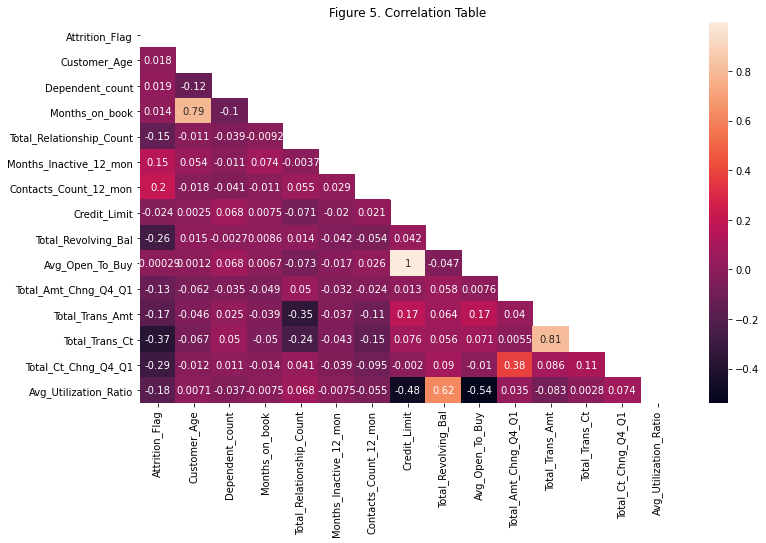

In [7]:
corr_df = df.copy()
corr_df.Attrition_Flag = np.where(corr_df.Attrition_Flag == 'Existing Customer', 0, 1)

corr_ = corr_df.corr()
mask = np.triu(np.ones_like(corr_))
sns.heatmap(corr_, annot=True, mask=mask)
plt.title('Figure 5. Correlation Table');

The correlation table in Figure 5 shows that `Total_Relationship_Count`, `Credit_Limit`, `Total_Revolving_Bal`, `Total_Amt_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1` and `Avg_Utilization_Ratio` are negatively correlated with `Attrition_Flag`. <br> This means the lower the values of these features, the higher the chances of a customer to churn.

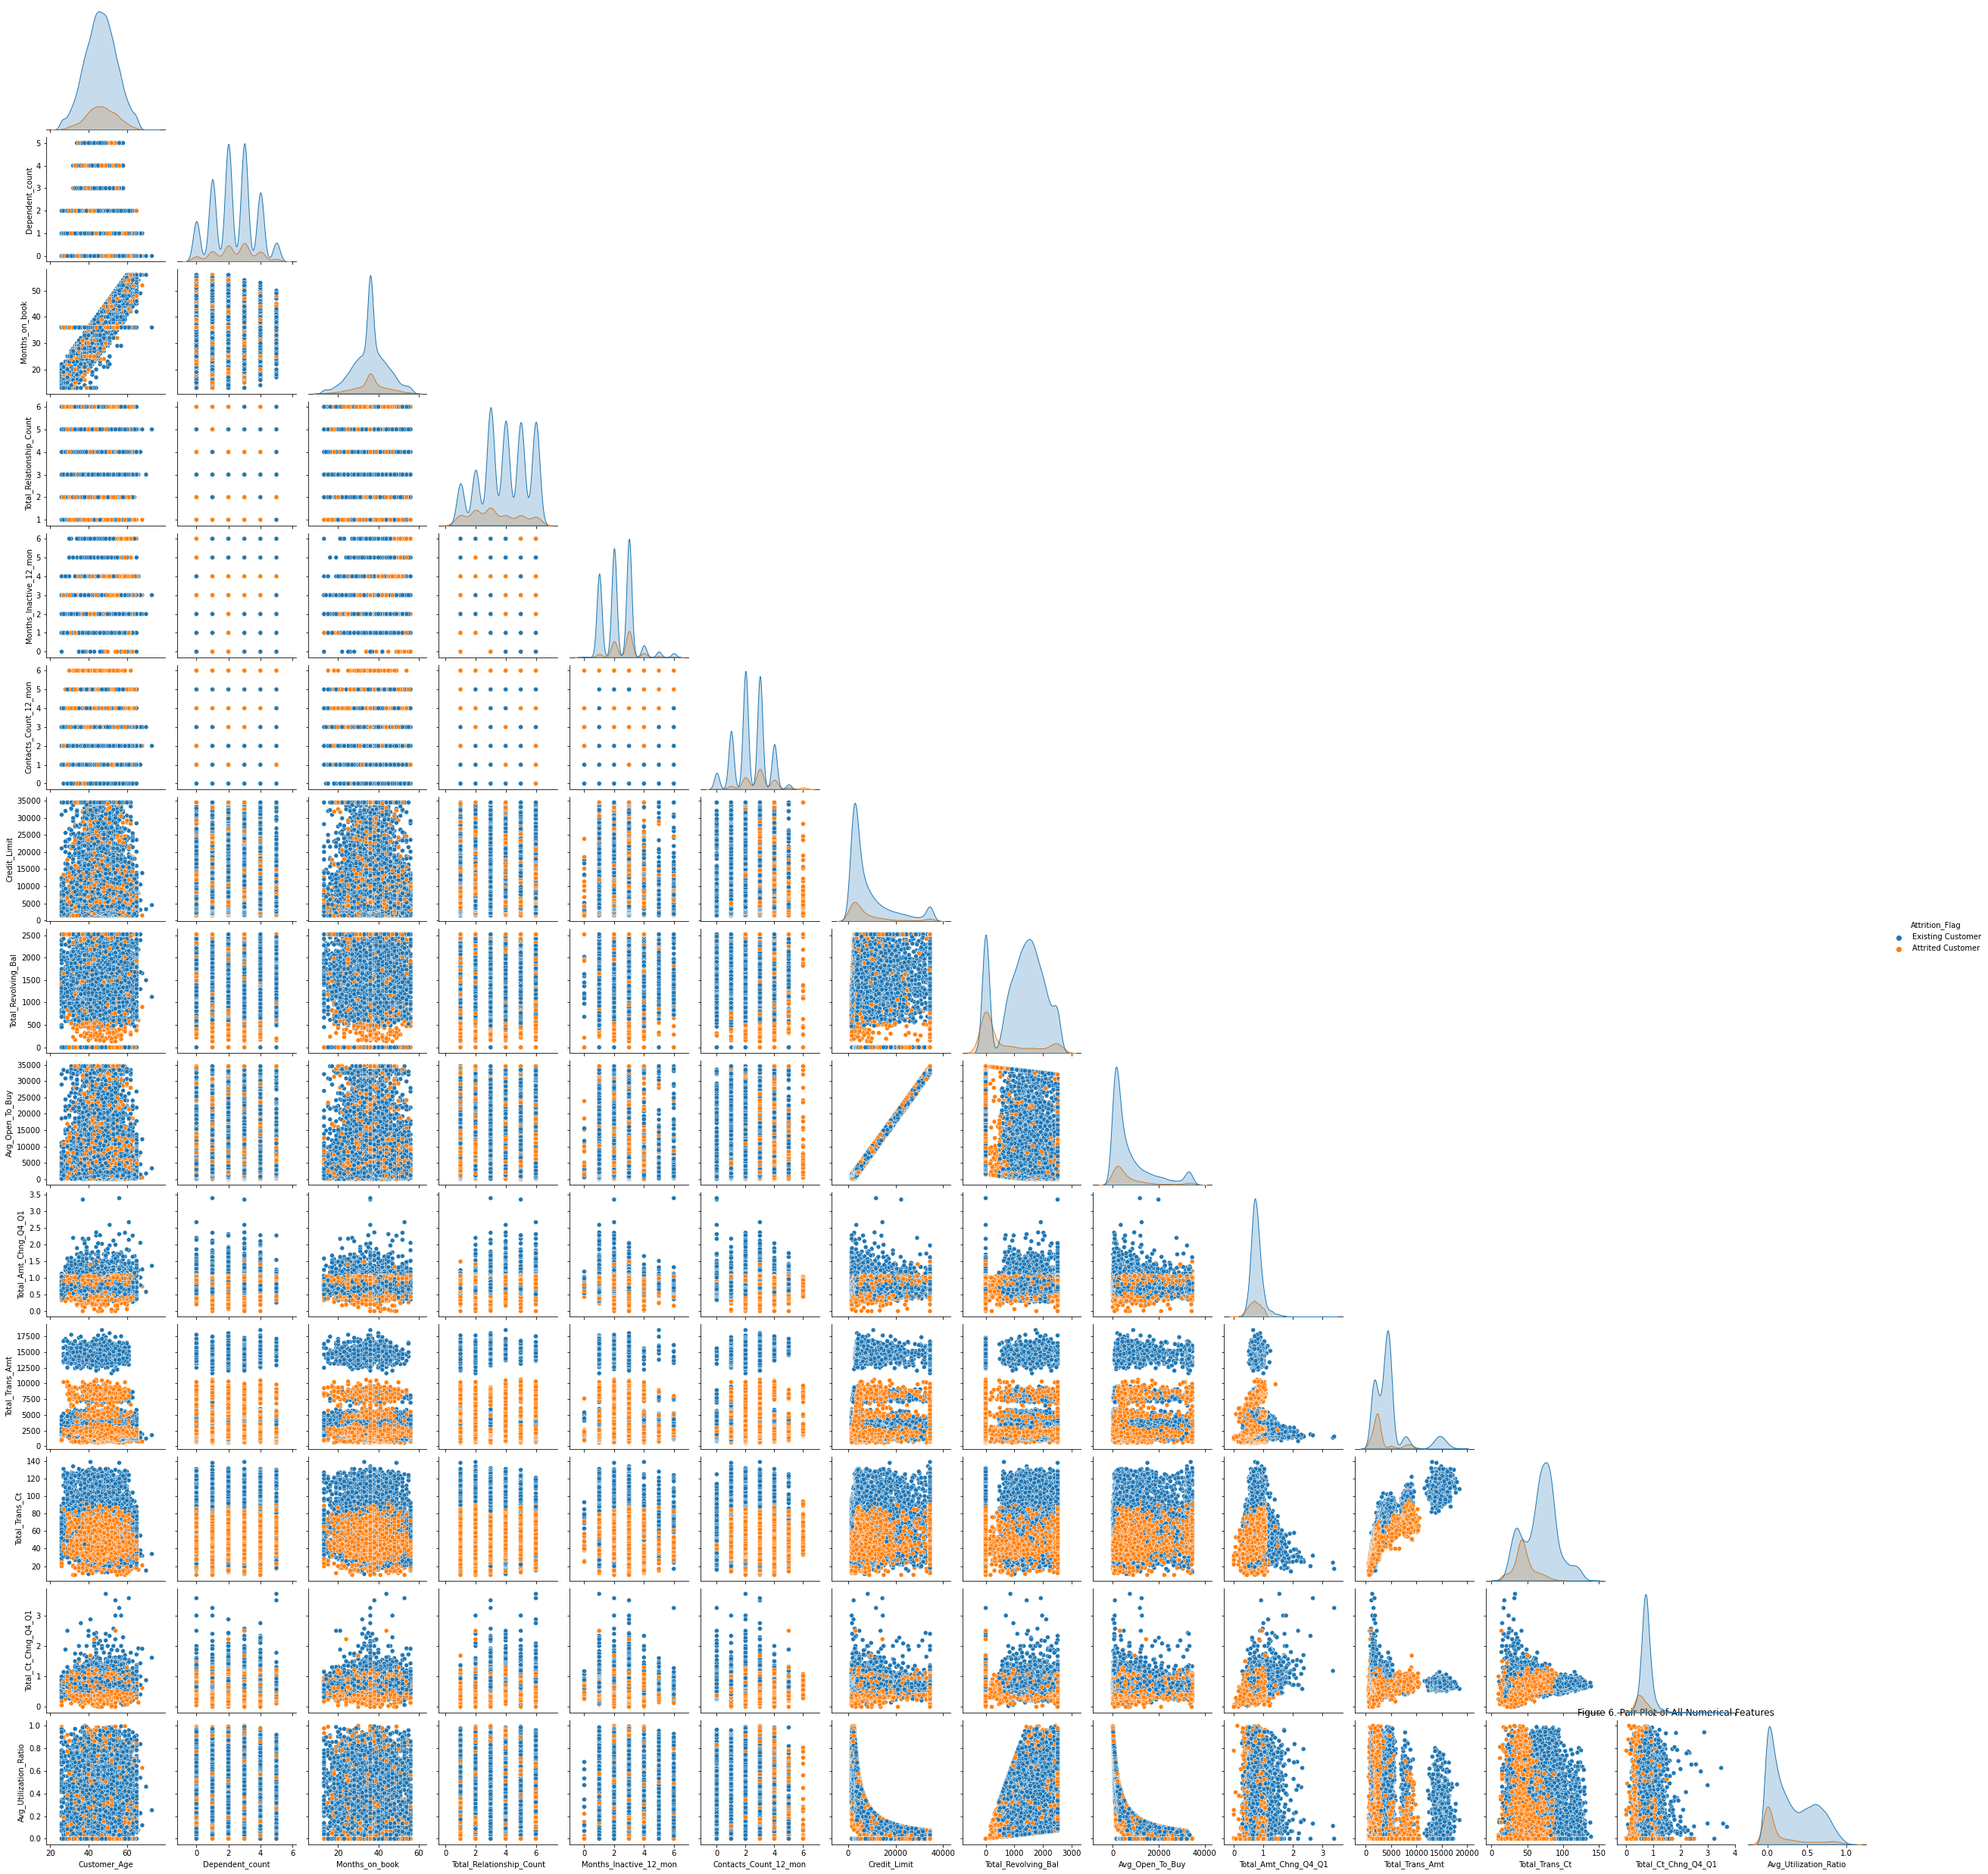

In [8]:
sns.pairplot(data=df, hue='Attrition_Flag', corner=True)
plt.title('Figure 6. Pair Plot of All Numerical Features');

The pair plot shows the different distribution plots of the numerical features of the dataset which is segregated by `Attrition_Flag`.

### Churn Customers Overview

In [9]:
b_df = df[df.Marital_Status != 'Unknown']
b_df = b_df[b_df.Education_Level != 'Unknown']
b_df = b_df[b_df.Income_Category != 'Unknown']

#### Revolving Balance

In [10]:
trans_amt = b_df.groupby(['Attrition_Flag'])['Total_Revolving_Bal'].mean()
trans_amt

Attrition_Flag
Attrited Customer     668.353998
Existing Customer    1260.589980
Name: Total_Revolving_Bal, dtype: float64

Average Revolving Balance for Churn Customers is at $668.35 which is 53.02% lower compared to Existing Clients. This means that the customers that churned have a lower amount of delayed payment amounts and are a better payer compared to the existing clients.

#### Total Transaction Amount

In [11]:
trans_amt = b_df.groupby(['Attrition_Flag'])['Total_Trans_Amt'].sum()
trans_amt

Attrition_Flag
Attrited Customer     3457308
Existing Customer    27658729
Name: Total_Trans_Amt, dtype: int64

Total Transaction Amount of the churned clients is at $3.45 million. The interest, annual membership fee and late payment fee could have been additional income for the company if these clients are still subscribing to the products.

#### Total Transaction Count by Income Category

In [12]:
income = b_df.groupby(['Attrition_Flag', 'Income_Category'])['Avg_Utilization_Ratio'].count()
income

Attrition_Flag     Income_Category
Attrited Customer  $120K +             102
                   $40K - $60K         204
                   $60K - $80K         145
                   $80K - $120K        189
                   Less than $40K      473
Existing Customer  $120K +             470
                   $40K - $60K        1208
                   $60K - $80K         958
                   $80K - $120K       1013
                   Less than $40K     2319
Name: Avg_Utilization_Ratio, dtype: int64

39.17% of churned clients have an income category of $60k and above. Almost 40% of the churned clients are big clients that have big potential in using the credit card more since they have higher income.

### Data Cleaning and Pre-Processing (Step 1 to 4)

#### Step 1. Identify missing values in tabular data
Missing values were identified in the bar plots under Exploratory Data Analysis where they were tagged as `Unknown` datapoints. 

#### Step 2. Eliminate samples or features with missing values
The missing values tagged as 'Unknown' are removed in the dataset before feeding it into the machine learning model. A total of 3,380 unknown values would be removed.

In [13]:
# Dropping Unknown in the Dataset
bank_df = df[df.Marital_Status != 'Unknown']
bank_df = bank_df[bank_df.Education_Level != 'Unknown']
bank_df = bank_df[bank_df.Income_Category != 'Unknown']

#### Step 3. Imputing missing values
No missing values were imputed since they were removed.

#### Step 4. Handling Categorical data
Ordinal features like `Education_Level`, `Income_Category` and `Card_Category` were converted to numerical values but still represented ranking. Nominal features like `Attrition_Flag` and `Gender` were converted to binary representative (1,0) and nominal feature, `Marital_Status`, was one-hot-encoded to represent their numerical values.

In [14]:
# Mapping Ordinal Variables
education = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Post-Graduate': 3,
    'Doctorate': 4
}

card = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

income = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4
}

# Converting Categorical Variables to Numerical
bank_df.Attrition_Flag = np.where(bank_df.Attrition_Flag == 'Existing Customer', 0, 1)
bank_df.Gender = np.where(bank_df.Gender == 'Male', 1, 0)
bank_df.Education_Level = np.where(bank_df.Education_Level == 'Graduate', 'College', bank_df.Education_Level)
bank_df.Education_Level = bank_df.Education_Level.map(education)
bank_df.Card_Category = bank_df.Card_Category.map(card)
bank_df.Income_Category = bank_df.Income_Category.map(income)

# One-Hot Encoding of Categorical Variables
bank_df = pd.get_dummies(bank_df, columns=['Marital_Status'], drop_first=True)

### Step 5. Bringing features onto the same scale
We check if we need to scale the data. Based on the max value per column, we need to scale the data to set them in the same scale. The scaling is done within the machine learning model function in `utilities.py`.

In [15]:
# To check if the dataset needs scaling
bank_df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single
count,7081.000000,7081.000000,7081.0,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,...,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,0.157181,46.347691,0.0,2.337805,1.588476,1.343313,0.082757,35.981359,3.819376,2.342607,...,8492.773831,1167.501624,7325.272207,0.760584,4394.299816,64.503319,0.711508,0.282313,0.503319,0.416325
std,0.363997,8.041225,0.0,1.291649,1.003723,1.355904,0.328819,8.002609,1.544444,0.995104,...,9126.072520,812.315606,9131.217585,0.223139,3468.461606,23.809330,0.238693,0.278731,0.500024,0.492984
min,0.000000,26.000000,0.0,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,...,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.0,1.000000,1.000000,0.000000,0.000000,31.000000,3.000000,2.000000,...,2498.000000,463.000000,1248.000000,0.629000,2089.000000,44.000000,0.583000,0.026000,0.000000,0.000000
50%,0.000000,46.000000,0.0,2.000000,2.000000,1.000000,0.000000,36.000000,4.000000,2.000000,...,4287.000000,1282.000000,3250.000000,0.735000,3831.000000,67.000000,0.700000,0.186000,1.000000,0.000000
75%,0.000000,52.000000,0.0,3.000000,2.000000,3.000000,0.000000,40.000000,5.000000,3.000000,...,10729.000000,1781.000000,9491.000000,0.858000,4740.000000,80.000000,0.818000,0.515000,1.000000,1.000000
max,1.000000,73.000000,0.0,5.000000,4.000000,4.000000,3.000000,56.000000,6.000000,6.000000,...,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000,1.000000,1.000000


### Setting up Features and Target Variable

In [16]:
X = bank_df.iloc[:, 1:] # features
y = bank_df.Attrition_Flag # target variable

### Machine Learning Models

In [17]:
# Computing PCC for benchmark on Classifier Models
pcc = 1.25*((y.value_counts()/len(y))**2).sum()
print(f'pcc = {pcc}')

pcc = 0.9188118427713643


In [18]:
# Splitting the dataset to trainval and holdout 
(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X, y, 
                                                random_state=11, test_size=0.25, 
                                                stratify=y)

In [19]:
start_time = time.time()
a = train_knn(X_trainval,y_trainval)

start_time = time.time()
b = train_svm(X_trainval,y_trainval,reg='l2')

start_time = time.time()
c = train_svm(X_trainval,y_trainval,reg='l1')

start_time = time.time()
d = train_DT(X_trainval,y_trainval, resample='none')

start_time = time.time()
e = train_ABC(X_trainval, y_trainval,reg='none', resample='none')

start_time = time.time()
f = train_RF(X_trainval,y_trainval, reg='none', resample='none')

start_time = time.time()
g = train_GBM(X_trainval,y_trainval, reg='none', resample='none')

### Summary Table

In [20]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Recall Score',
        'Precision Score', 'Best Parameter', 'Top Predictor Variable',
        'Run Time']

summary_table = pd.DataFrame(columns=cols)

summary_table.loc[0] = a
summary_table.loc[1] = b
summary_table.loc[2] = c
summary_table.loc[3] = d
summary_table.loc[4] = e
summary_table.loc[5] = f
summary_table.loc[6] = g

summary_table

,Machine Learning Method,Test Accuracy,Recall Score,Precision Score,Best Parameter,Top Predictor Variable,Run Time
0,kNN,0.901318,0.396407,0.844338,N_Neighbor = 5,NA,161.820869
1,Linear SVM (l2),0.901883,0.547305,0.762009,C = 5,Total_Trans_Ct,39.154890
2,Linear SVM (l1),0.901507,0.546108,0.760348,C = 10,Total_Trans_Ct,11.467801
3,Decision Tree,0.938418,0.768862,0.827604,Max depth = 10,Total_Trans_Ct,5.371155
4,AdaBoost Classifier,0.955556,0.838323,0.874000,n_estimators = 200,Total_Trans_Amt,146.237311
5,Random Forest,0.959134,0.814371,0.916598,Max_features = 0.4,Total_Trans_Ct,74.220690
6,Gradient Boosting Method,0.968550,0.865868,0.929709,Max_features = 0.8,Total_Trans_Amt,114.934804


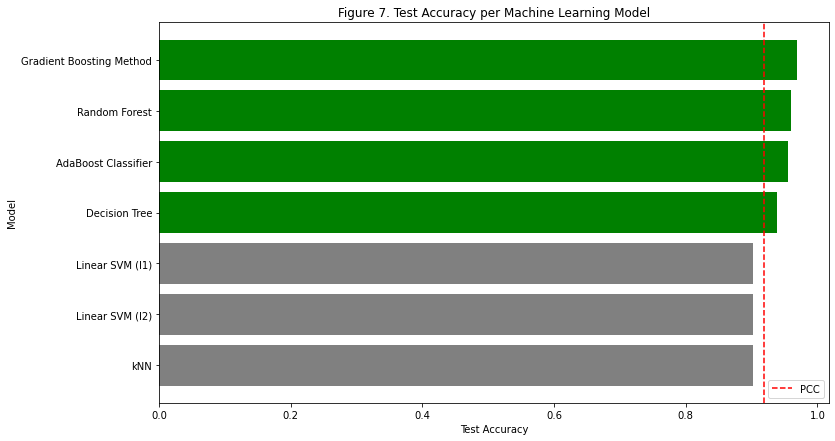

In [21]:
fig, ax = plt.subplots()
plt.barh('Machine Learning Method', 'Test Accuracy',
         data=summary_table, color=['gray', 'gray', 'gray',
                                    'g', 'g', 'g', 'g'])
ax.axvline(pcc, color='red', linestyle='--', label='PCC')
plt.ylabel('Model')
plt.xlabel('Test Accuracy')
plt.legend()
plt.title('Figure 7. Test Accuracy per Machine Learning Model');

### Confusion Matrix

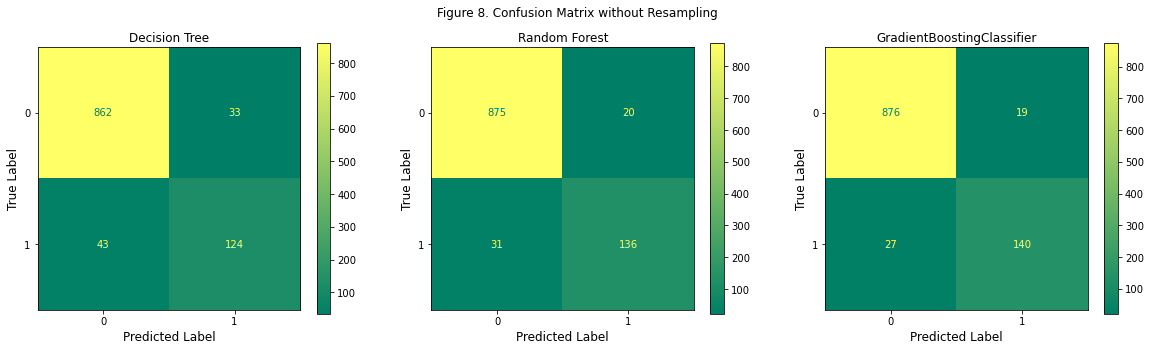

In [22]:
conf_matrix(X_trainval, y_trainval, 8, resample='none')

### Feature Importance

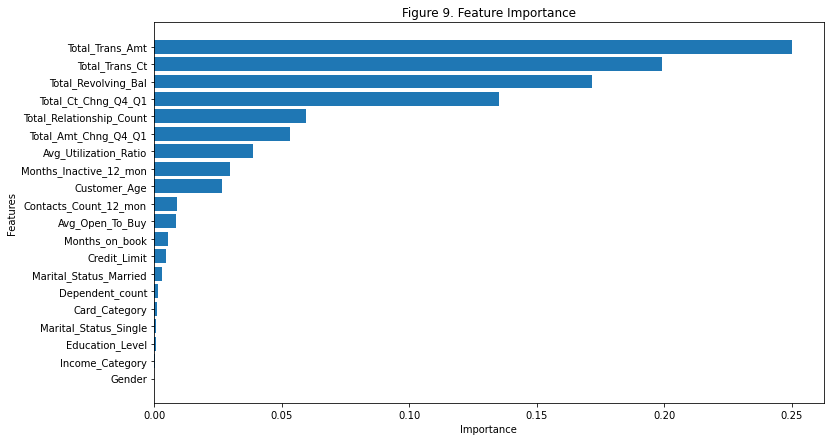

In [23]:
skf = StratifiedKFold(n_splits=5)
for train_index, val_index in skf.split(X_trainval, y_trainval):
            X_train, X_val = X_trainval.iloc[train_index], X_trainval.iloc[val_index]
            y_train, y_val = y_trainval.iloc[train_index], y_trainval.iloc[val_index]

svc = GradientBoostingClassifier(n_estimators=300,max_depth=3, max_features=0.5).fit(X_train, y_train)

coefs = svc.feature_importances_
abs_coefs = np.abs(coefs[:])
coefs_count = len(abs_coefs)

fig, ax = plt.subplots()
ax.barh(np.arange(coefs_count), sorted(abs_coefs))
ax.set_yticks(np.arange(coefs_count))
ax.set_yticklabels(X.columns[np.argsort(abs_coefs)])
ax.set_ylabel('Features')
ax.set_xlabel('Importance')
ax.set_title('Figure 9. Feature Importance');

Without using resampling techniques, the top 5 features that have an impact on the churning of clients are `Total_Trans_Ct`, `Total_Trans_Amt`, `Total_Revolving_Bal`, `Total_Ct_Chng_Q4_Q1`, and `Avg_Utilization_Ratio`.

### Applying Resampling Techniques

### SMOTE

In [24]:
start_time = time.time()
a_smote = train_DT(X_trainval, y_trainval, resample='SMOTE')

start_time = time.time()
b_smote = train_RF(X_trainval, y_trainval, reg='none', resample='SMOTE')

start_time = time.time()
c_smote = train_GBM(X_trainval, y_trainval, reg='none', resample='SMOTE')

start_time = time.time()
d_smote = train_ABC(X_trainval, y_trainval, reg='none', resample='SMOTE')

In [25]:
smote_summary = pd.DataFrame(columns=cols)

smote_summary.loc[0] = a_smote
smote_summary.loc[1] = b_smote
smote_summary.loc[2] = c_smote
smote_summary.loc[3] = d_smote

smote_summary['Resampling Method'] = 'SMOTE'
smote_summary

,Machine Learning Method,Test Accuracy,Recall Score,Precision Score,Best Parameter,Top Predictor Variable,Run Time,Resampling Method
0,Decision Tree,0.935405,0.813174,0.784815,Max depth = 9,Total_Trans_Ct,8.211097,SMOTE
1,Random Forest,0.958192,0.873054,0.862866,Max_features = 0.4,Total_Trans_Ct,101.290864,SMOTE
2,Gradient Boosting Method,0.969303,0.910180,0.896187,Max_features = 0.3,Total_Trans_Ct,143.852653,SMOTE
3,AdaBoost Classifier,0.954237,0.881437,0.836363,n_estimators = 100,Total_Trans_Amt,180.048199,SMOTE


#### Confusion Matrix

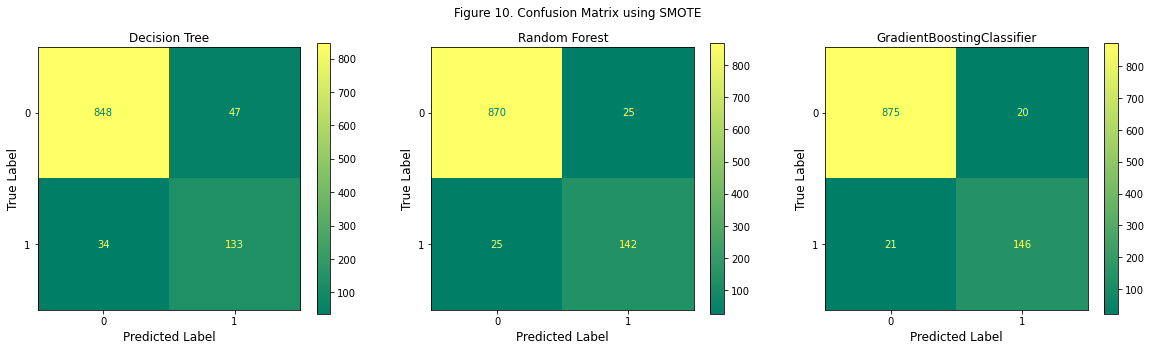

In [26]:
conf_matrix(X_trainval, y_trainval, 10, resample='SMOTE')

### ADASYN

In [27]:
start_time = time.time()
a_adasyn = train_DT(X_trainval, y_trainval, resample='ADASYN')

start_time = time.time()
b_adasyn = train_RF(X_trainval, y_trainval, reg='none', resample='ADASYN')

start_time = time.time()
c_adasyn = train_GBM(X_trainval, y_trainval, reg='none', resample='ADASYN')

start_time = time.time()
d_adasyn = train_ABC(X_trainval, y_trainval, reg='none', resample='ADASYN')

In [28]:
adasyn_summary = pd.DataFrame(columns=cols)

adasyn_summary.loc[0] = a_adasyn
adasyn_summary.loc[1] = b_adasyn
adasyn_summary.loc[2] = c_adasyn
adasyn_summary.loc[3] = d_adasyn

adasyn_summary['Resampling Method'] = 'ADASYN'
adasyn_summary

,Machine Learning Method,Test Accuracy,Recall Score,Precision Score,Best Parameter,Top Predictor Variable,Run Time,Resampling Method
0,Decision Tree,0.931827,0.832335,0.758300,Max depth = 10,Total_Trans_Ct,9.381850,ADASYN
1,Random Forest,0.959134,0.870659,0.869607,Max_features = 0.3,Total_Trans_Ct,115.764237,ADASYN
2,Gradient Boosting Method,0.967043,0.902994,0.889197,Max_features = 0.4,Total_Trans_Ct,155.670090,ADASYN
3,AdaBoost Classifier,0.949529,0.865868,0.822457,n_estimators = 250,Total_Trans_Amt,182.316642,ADASYN


#### Confusion Matrix

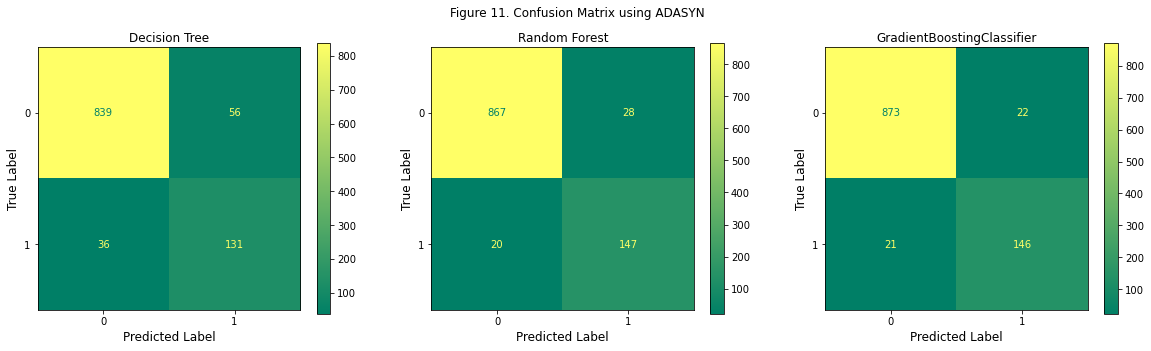

In [29]:
conf_matrix(X_trainval, y_trainval, 11, resample='ADASYN')

### SMOTE-NC

In [30]:
start_time = time.time()
a_smotenc = train_DT(X_trainval, y_trainval, resample='SMOTENC')

start_time = time.time()
b_smotenc = train_RF(X_trainval, y_trainval, reg='none', resample='SMOTENC')

start_time = time.time()
c_smotenc = train_GBM(X_trainval, y_trainval, reg='none', resample='SMOTENC')

start_time = time.time()
d_smotenc = train_ABC(X_trainval, y_trainval, reg='none', resample='SMOTENC')

In [31]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Recall Score',
        'Precision Score', 'Best Parameter', 'Top Predictor Variable',
        'Run Time']

smotenc_summary = pd.DataFrame(columns=cols)

smotenc_summary.loc[0] = a_smotenc
smotenc_summary.loc[1] = b_smotenc
smotenc_summary.loc[2] = c_smotenc
smotenc_summary.loc[3] = d_smotenc

smotenc_summary['Resampling Method'] = 'SMOTE-NC'
smotenc_summary

,Machine Learning Method,Test Accuracy,Recall Score,Precision Score,Best Parameter,Top Predictor Variable,Run Time,Resampling Method
0,Decision Tree,0.933145,0.811976,0.775505,Max depth = 8,Total_Trans_Ct,14.273577,SMOTE-NC
1,Random Forest,0.958192,0.871856,0.864027,Max_features = 0.4,Total_Trans_Ct,119.416572,SMOTE-NC
2,Gradient Boosting Method,0.966855,0.901796,0.889048,Max_features = 0.3,Total_Trans_Ct,137.252407,SMOTE-NC
3,AdaBoost Classifier,0.952354,0.879042,0.828639,n_estimators = 100,Total_Trans_Amt,180.159750,SMOTE-NC


#### Confusion Matrix

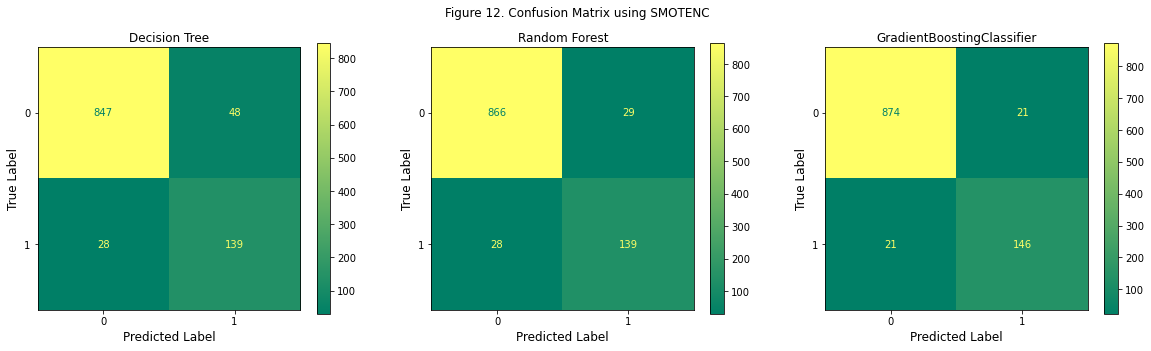

In [32]:
conf_matrix(X_trainval, y_trainval, 12, resample='SMOTENC')

### SMOTE-ENN

In [33]:
start_time = time.time()
a_smoteenn = train_DT(X_trainval, y_trainval, resample='SMOTEENN')

start_time = time.time()
b_smoteenn = train_RF(X_trainval, y_trainval, reg='none', resample='SMOTEENN')

start_time = time.time()
c_smoteenn = train_GBM(X_trainval, y_trainval, reg='none', resample='SMOTEENN')

start_time = time.time()
d_smoteenn = train_ABC(X_trainval, y_trainval, reg='none', resample='SMOTEENN')

In [34]:
smoteenn_summary = pd.DataFrame(columns=cols)

smoteenn_summary.loc[0] = a_smoteenn
smoteenn_summary.loc[1] = b_smoteenn
smoteenn_summary.loc[2] = c_smoteenn
smoteenn_summary.loc[3] = d_smoteenn

smoteenn_summary['Resampling Method'] = 'SMOTE-ENN'
smoteenn_summary

,Machine Learning Method,Test Accuracy,Recall Score,Precision Score,Best Parameter,Top Predictor Variable,Run Time,Resampling Method
0,Decision Tree,0.921092,0.816766,0.719439,Max depth = 6,Total_Trans_Ct,13.983640,SMOTE-ENN
1,Random Forest,0.928437,0.831138,0.744835,Max_features = 0.5,Total_Trans_Amt,73.389580,SMOTE-ENN
2,Gradient Boosting Method,0.940678,0.851497,0.789688,Max_features = 0.3,Total_Trans_Amt,126.429612,SMOTE-ENN
3,AdaBoost Classifier,0.938983,0.861078,0.776164,n_estimators = 150,Total_Trans_Amt,150.241842,SMOTE-ENN


#### Confusion Matrix

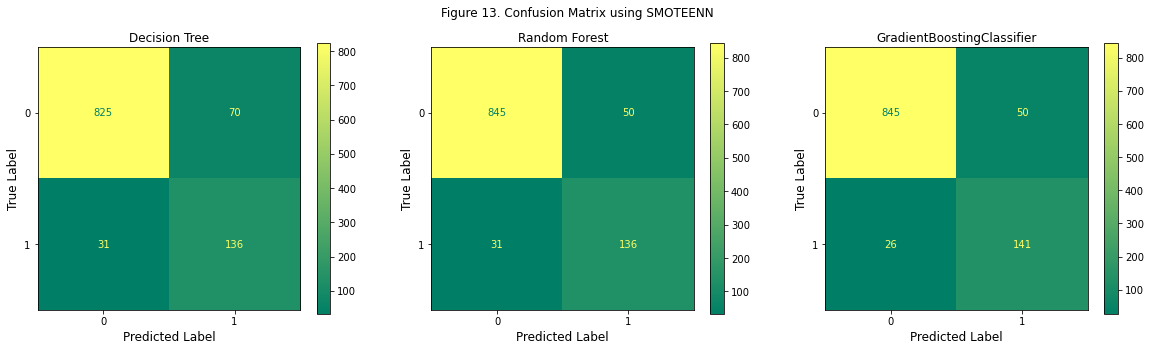

In [43]:
conf_matrix(X_trainval, y_trainval, 13, resample='SMOTEENN')

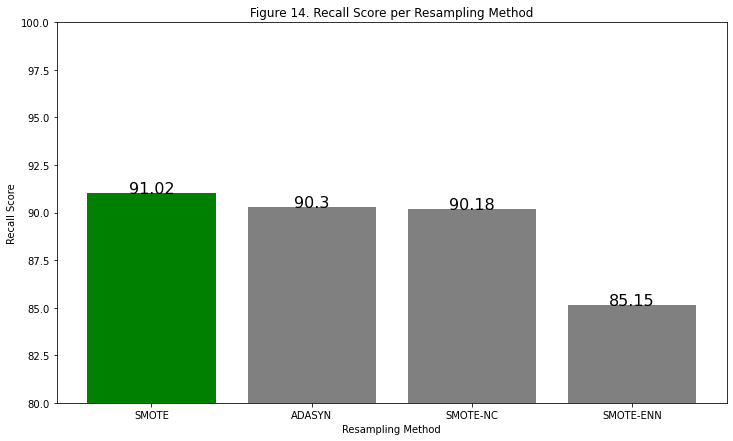

In [35]:
res_recall = [float("{:.2f}".format(c_smote[2]*100)),
              float("{:.2f}".format(c_adasyn[2]*100)),
              float("{:.2f}".format(c_smotenc[2]*100)),
              float("{:.2f}".format(c_smoteenn[2]*100))]

res_method = ['SMOTE', 'ADASYN', 'SMOTE-NC', 'SMOTE-ENN']

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center', fontsize=16)

plt.bar(x=res_method,
        height=res_recall,
       color=['g', 'grey', 'grey', 'grey'])

addlabels(res_method, res_recall)
plt.xlabel("Resampling Method")
plt.ylabel("Recall Score")
plt.ylim((80,100))
plt.title("Figure 14. Recall Score per Resampling Method")
plt.show()

Doing resampling on the dataset has improve the recall score for all models. The confusion matrix using the different resampling technique shows that Gradient Boosting Method is still the best model. Based on all the resampling techniques performed, using SMOTE had the best recall score at 90.90% which is a 4.41% increase on the recall score which no resampling techniques was performed. 

### Interpretability Techniques

### SHAP

In [36]:
skf = StratifiedKFold(n_splits=5)
for train_index, val_index in skf.split(X_trainval, y_trainval):
    X_train, X_val = X_trainval.iloc[train_index], X_trainval.iloc[val_index]
    y_train, y_val = y_trainval.iloc[train_index], y_trainval.iloc[val_index]
    
X_train, y_train = SMOTE(
    sampling_strategy=0.5,
    n_jobs=-1,
    random_state=143).fit_resample(X_train, y_train)

model = GradientBoostingClassifier(n_estimators=300,max_depth=3, max_features=0.3).fit(X_train, y_train)

In [37]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_holdout)

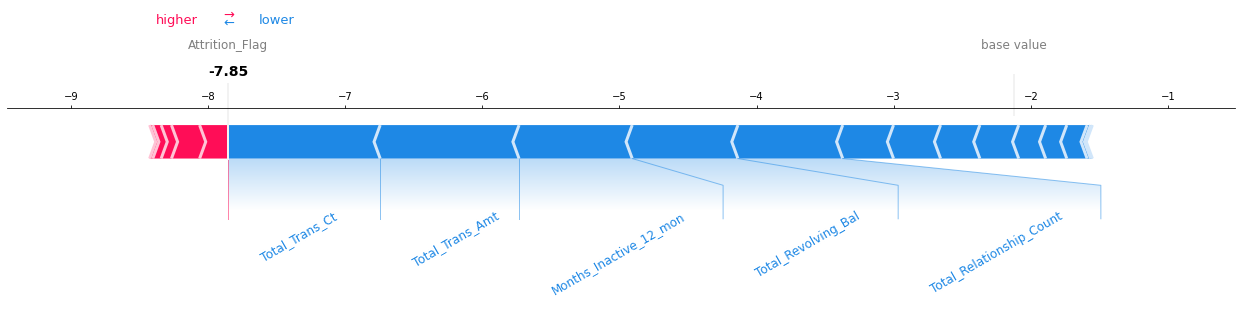

In [38]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(base_value = explainer.expected_value, 
                shap_values = shap_values[0], 
                feature_names = X_holdout.columns, 
                out_names = 'Attrition_Flag',
                matplotlib=True, 
                figsize=(22, 4), 
                text_rotation=30)

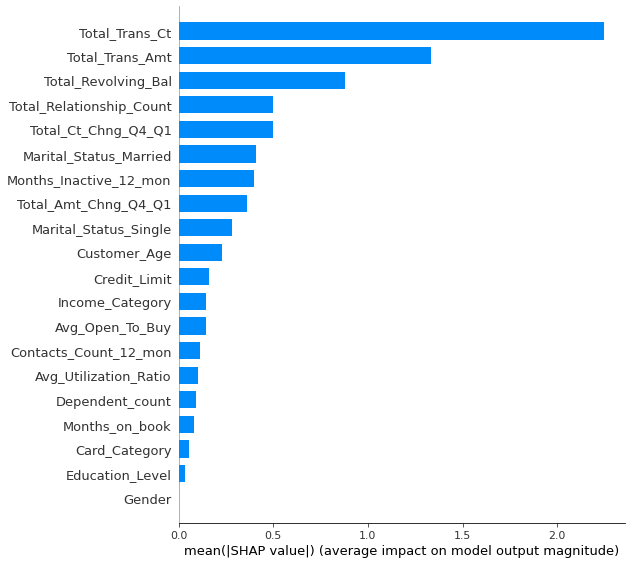

In [39]:
# Plot the features'average impact on the model output's magnitude
shap.summary_plot(shap_values = shap_values, 
                  features = X_holdout, 
                  plot_type="bar")

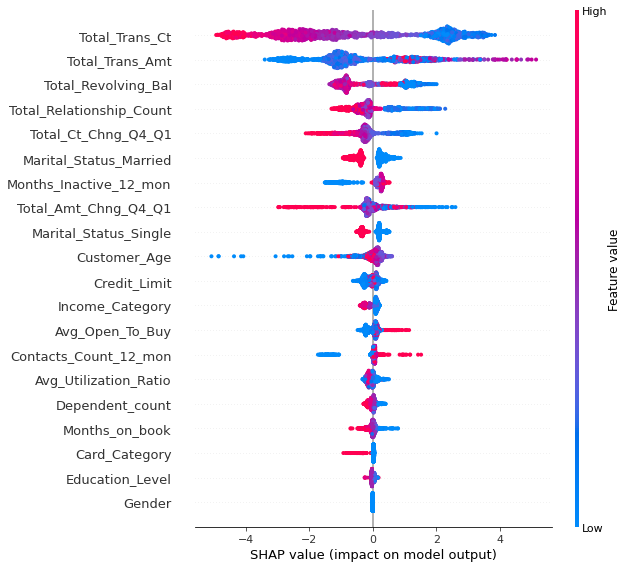

In [40]:
# summarize the effects of all the features
shap.summary_plot(shap_values = shap_values, 
                  features = X_holdout)

SHAP's summary plot tells that the top 5 most import features are `Total_Trans_Ct`, `Total_Trans_Amt`, `Total_Revolving_Bal`, `Total_Relationship_Count`, and `Total_Ct_Chng_Q4_Q1`. `Total_Trans_Amt` here has a high positive correlation which means when the transaction amount increase, the probability of the client churning will also increase. For `Total_Trans_Ct`, it has a high negative correlation with the target feature which means when the count increase, the probability of client churning decreases.

### Partial Dependence Plot

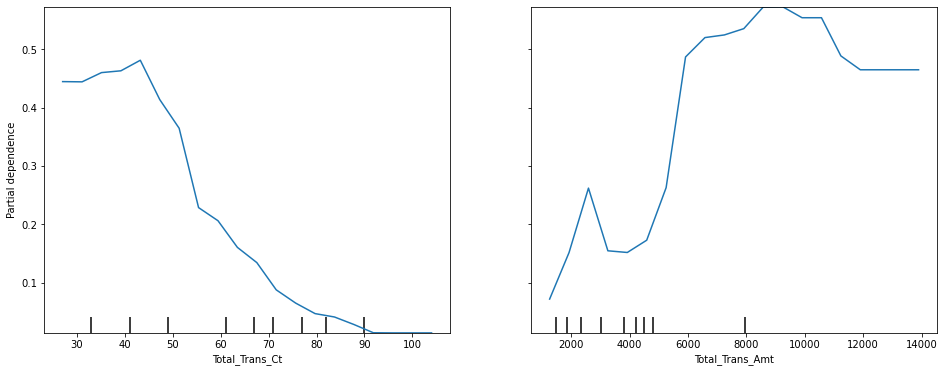

In [41]:
# Define features to include in the plots
# This can be a single feature, or a combination of features, given as a tuple
features = ['Total_Trans_Ct', 'Total_Trans_Amt']

# Intialize figure to be used in plotting
fig, ax = plt.subplots(figsize=(16, 6))

# Generate the partial dependence plot using
# PartialDependenceDisplay.from_estimator method
display = PartialDependenceDisplay.from_estimator(
    estimator=model,             # Estimator to be used
    X=X_val,           # Data to be used for interpretation
    features=features,           # Feature list to be inspected
    feature_names=X_val.columns, # Feature names in the data
    kind="average",              # kind='average' refers to PDP
    n_jobs=3,                    # Number of CPU to compute the PDP in parallel
    grid_resolution=20,          # Number of points to be used in setting the
                                 #     feature of interest
    random_state=143,           # Set random state for reproducibility
    method='brute',              # Choose method of computing PDP
    ax=ax,  
)

The PDP plot for `Total_Trans_Ct` also tells us that when the value of it grows, the less likely the churning of the client will happen. As for the `Total_Trans_Amt`, when the amount increases, the probability of the client churning also increases.

### ICE

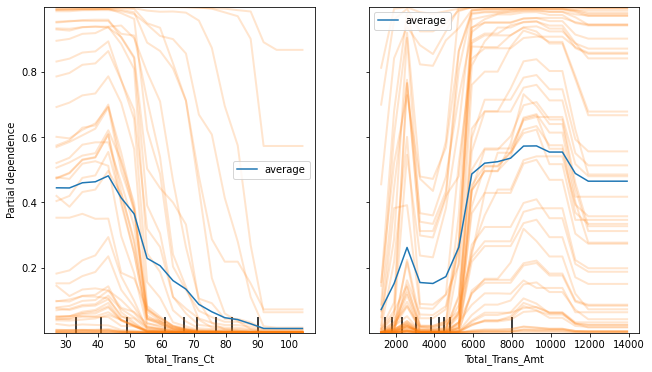

In [42]:
# Set features of interest
features = ['Total_Trans_Ct', 'Total_Trans_Amt']

# Intialize figure to be used in plotting
fig, ax = plt.subplots(figsize=(16*2/3, 6))

# Generate partial dependence display plot
display = PartialDependenceDisplay.from_estimator(
    estimator=model,             # Estimator to be used
    X=X_val,           # Data to be used for interpretation
    features=features,           # Feature list to be inspected
    feature_names=X_val.columns, # Feature names in the data
    kind="both",                 # kind='average' refers to PDP
    n_jobs=3,                    # Number of CPU to compute the PDP in parallel
    grid_resolution=20,          # Number of points to be used in setting the
                                 #     feature of interest
    random_state=1337,           # Set random state for reproducibility
    subsample=50,                # Number of subsample ICE to plot
    ice_lines_kw={               # Set the keyword arguments for the format of
        'color': 'tab:orange',   #     the ICE lines. Here, we set the color of
        'alpha': 0.20,           #     the lines to be orange, 0.20 opacity,
        'linewidth': 2,          #     and line width of 2 pts.
    },
    ax=ax,
)

The ICE plot for both `Total_Trans_Ct` and `Total_Trans_Amt` shows all the datapoints have the same trend with the average.

### Results and Discussion

The `Gradient Boosting Method` is the best model to use for prediction of customers that will churn because it has a test accuracy of 96.91% but accuracy isn't everything when it comes to imbalanced datasets. For this problem in predicting churn customers, focusing on the recall score indicates how well the model is doing in classifying the positive outcome correctly. The recall score using Gradient Boosting Method is 86.76%

The goal of this project is to improve the recall score because this would generate better savings for the company. Better savings in the sense that it is cheaper to focus and exert extra efforts in retaining customers than investing on new ones. Different resampling methods were used and all of them improved the recall score but the resampling technique that had the best recall score is `SMOTE`.

Looking at the top five features of SHAP, `Total_Trans_Ct`, `Total_Trans_Amt`, `Total_Revolving_Bal`, `Total_Relationship_Count`, and `Total_Ct_Chng_Q4_Q1` would help understand customer credit card churn. Most of these top features are related on the usage of the credit card. If we compare it with the correlation map in Figure 2, these top features also shows a negative correlation with attrition_flag. So in short, these top features have an impact on how to address the problem on customer churning. 

The beauty of using SHAP and other interpretability models to interpret the model is we know if high or low values of the features have the impact in the model. For example, in Figure 9, the model tells us that `Total_Trans_Amt` is a feature that has an impact to the customers churning however in Figure 17, SHAP tells that if `Total_Trans_Amt` is high then it has more impact or high probability that the customer will churn.


### Conclusion

In order for banks to retain customers, they have to increase the customer's usage of the credit card:
* **To increase credit limit** <br>
    According to Balance Due: Credit Card Debit Nears $1 Trillion As Banks Push Plastic in Wall Street Journal, CapitalOne, the fourth largest credit card issuer in the USA, increased credit card spend 20% year-on-year by raising spending limits. Increasing the credit limit of customers will give them more purchasing capabilities, thus will increase the Total Transaction Count and Total Transaction Amount. 
    

* **To improve or add more rewards perks** <br>
    Improving the rewards system of credit card points will not only retain current clients but also attract new ones. If there is an appealing rewards system inplace, that will ensure customers to use credit cards to collect points rather than paying in cash. This would also convert cash transaction to become credit transaction which will increase the Total Transaction Count and Total Transaction Amount of the client.
    
They can also use the top features as standard metrics in checking if their clients are most likely will churn. These will tell if the clients will churn:
* **Total Transaction Count (High Negative Correlation)**
* **Total Transaction Amount (High Positive Correlation)**
* **Total Revolving Balance (High Negative Correlation)**
* **Total Relationship Count or High Total No. of Products Availed (High Negative Correlation)**
* **Total Count Change of Q4 vs Q1 (High Negative Correlation)**

With these metrics, they can monitor their clients and do necessary efforts and invest in resources that may help in client retention. They can offer promotions and rebates to increase the transaction count of the client or offer delayed payment or grace period options to increase the revolving balance of the client.


### References
1. Swaminathan, Ketharaman. 2009. Five Ways  For Banks To Boost Credit Card Use. <br>
https://www.finextra.com/blogposting/12657/five-ways-for-banks-to-boost-credit-card-use


2. Batista, David. 2018. Evaluation Metrics, ROC-Curves and imbalanced datasets. <br>
http://www.davidsbatista.net/blog/2018/08/19/NLP_Metrics/


3. du Toit, Gerard and Burns, Maureen. 2016. Many Banks Are Losing Customers And Don't Even Know It. <br>
https://www.forbes.com/sites/baininsights/2016/12/15/many-banks-are-losing-customers-and-dont-even-know-it/?sh=250099202935


4. sakshigoya17, Kaggle. 2020. Credit Card customers <br>
https://www.kaggle.com/sakshigoyal7/credit-card-customers


5. Harumi. 2020. What is Customer Churn? How to Calculate Customer Churn Rate? <br>
https://store.magenest.com/blog/calculate-customer-churn-rate/